In [42]:
import pandas as pd
import numpy as np 
import scipy.stats as sts
import plotly 
from matplotlib import pyplot as plt
import seaborn as sns 

from ab_tests.design_report import ReportABDesign

In [43]:
df = pd.read_excel(
    "статистика-2024-05-16T00_00_00Z-2024-06-14T00_00_00Z-13614595.xlsx", 
    sheet_name="Статистика по ключевым словам",
    parse_dates=['Дата']
)
df['ctr'] = df['Клики'] * 100 / df['Просмотры']
df.head()

Ключевая фраза  Просмотры  Клики  CTR  Затраты  \
0     жакет женский оверсайз прямой          1      0  0.0     0.18   
1  пиджак с одной пуговицей женский          1      0  0.0     0.18   
2        жакет укороченный из твида          3      0  0.0     0.54   
3  пиджак женский твидовый в клетку          1      0  0.0     0.14   
4   жакет женский твидовый в клетку          1      0  0.0     0.14   

        Дата  ctr  
0 2024-05-19  0.0  
1 2024-05-21  0.0  
2 2024-05-19  0.0  
3 2024-06-09  0.0  
4 2024-06-09  0.0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ключевая фраза  3270 non-null   object        
 1   Просмотры       3270 non-null   int64         
 2   Клики           3270 non-null   int64         
 3   CTR             3270 non-null   float64       
 4   Затраты         3270 non-null   float64       
 5   Дата            3270 non-null   datetime64[ns]
 6   ctr             3270 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 179.0+ KB


In [45]:
df.describe()

Просмотры        Клики          CTR      Затраты  \
count  3270.000000  3270.000000  3270.000000  3270.000000   
mean     13.278287     0.556575     0.032670     2.308391   
min       1.000000     0.000000     0.000000     0.140000   
25%       1.000000     0.000000     0.000000     0.170000   
50%       2.000000     0.000000     0.000000     0.270000   
75%       4.000000     0.000000     0.000000     0.660000   
max    1070.000000    55.000000     2.000000   212.460000   
std      55.907521     2.927963     0.150583    10.277872   

                                Дата          ctr  
count                           3270  3270.000000  
mean   2024-05-28 04:31:42.385321216     3.267681  
min              2024-05-16 00:00:00     0.000000  
25%              2024-05-21 00:00:00     0.000000  
50%              2024-05-27 00:00:00     0.000000  
75%              2024-06-04 00:00:00     0.000000  
max              2024-06-14 00:00:00   200.000000  
std                              NaN    15.058871

In [46]:
print(df['Дата'].max())
print(df['Дата'].min())

2024-06-14 00:00:00
2024-05-16 00:00:00


Данных практически целый месяц. Первое что я хочу узнать, сколько данных нужно для отслеживания значимых изменений и какой размех изменений мы способны отследить

##### Постановка гипотезы

1) Меняем - главное фото товара
2) Влияем на CTR
3) Измеряем по ключам в течении какого-то времени

# Фиксирую интервалы
1) ["2024-06-06", "2024-06-13,"]
2) ["2024-05-29", "2024-06-05"]

In [47]:
# Фиксирую интервалы
A_interval = ["2024-06-06", "2024-06-13"]  
B_interval = ["2024-05-28", "2024-06-05"]
history_interval = ["2024-05-20", "2024-05-27"]

In [48]:
A = df[
    (df['Дата'] >= A_interval[0])
    &
    (df['Дата'] <= A_interval[1])
]
B = df[
    (df['Дата'] >= B_interval[0])
    &
    (df['Дата'] <= B_interval[1])
]
history = df[
    (df['Дата'] >= history_interval[0])
    &
    (df['Дата'] <= history_interval[1])
]
A['ctr'] = A['Клики'] * 100 / A['Просмотры']
B['ctr'] = B['Клики'] * 100 / B['Просмотры']

/var/folders/zx/y74sht7n7xq6rcywcs7_j43m0000gn/T/ipykernel_83800/1776931353.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zx/y74sht7n7xq6rcywcs7_j43m0000gn/T/ipykernel_83800/1776931353.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
a_ctr = A['Клики'].sum() * 100 / A['Просмотры'].sum()

In [50]:
b_ctr = B['Клики'].sum() * 100 / B['Просмотры'].sum()

In [51]:
testing = ReportABDesign()

In [52]:
report, table, trend_graph, trend_report = testing.check_testing_design(
    df=B,
    metric_name='ctr',
    need_absolute_effect=1,
    date_name="Дата"
)

In [53]:
print(report)


        std: 14.125613007334755;
        Кол-во наблюдений: 928;
        MDE: 1.8371818697964357;
        
Вы можете отследить эффект в 1.837 больший, нежели хотите, измените дизайн.
То есть, только если ваша метрика выростет до >4.925 или упадет до <1.251, изменения будут стат значимы.
Для отслеживания эффекта в 1 соберите 3133 наблюдений,
либо измените дизайн тестирования в соотвествии с таблицей ошибок и эффектов.


In [54]:
print(trend_report)

Kendall tau correlation: -0.002
P-value: 0.925
The trend is not significant.


In [55]:
table

errors     0.05    0.10    0.15   0.20
effects                               
5.0%     217553  143373  102634  75470
10.0%     54389   35844   25659  18868
15.0%     24173   15931   11404   8386
20.0%     13598    8961    6415   4717
25.0%      8703    5735    4106   3019
30.0%      6044    3983    2851   2097
35.0%      4440    2926    2095   1541
40.0%      3400    2241    1604   1180
45.0%      2686    1771    1268    932
50.0%      2176    1434    1027    755

In [56]:
trend_graph.show()

Для малого бизнеса собирать столь большое кол-во наблюдений - нецелсообразно. Я считаю что в реалии невозможности работы с большими данными нужно:

1) Принимать больший риск - увеличивать вероятности ошибок
2) Существенно минимизировать дисперсию в данных - работать с главыми ключами
3) Увеличивать вес экспертной оценки в принятии решений

In [57]:
A_clear = A[A['Просмотры'] > 30]
B_clear = B[B['Просмотры'] > 30]

In [58]:
report, table, trend_graph, trend_report = testing.check_testing_design(
    df=B_clear,
    metric_name='ctr',
    need_absolute_effect=1,
    date_name="Дата"
)

In [59]:
print(report)


        std: 2.4279995175016174;
        Кол-во наблюдений: 55;
        MDE: 1.2971377138333222;
        
Вы можете отследить эффект в 1.297 больший, нежели хотите, измените дизайн.
То есть, только если ваша метрика выростет до >4.69 или упадет до <2.096, изменения будут стат значимы.
Для отслеживания эффекта в 1 соберите 93 наблюдений,
либо измените дизайн тестирования в соотвествии с таблицей ошибок и эффектов.


In [60]:
print(trend_report)

Kendall tau correlation: -0.190
P-value: 0.042
The trend is significant.


In [61]:
table

errors   0.05  0.10  0.15  0.20
effects                        
5.0%     5323  3508  2511  1847
10.0%    1331   877   628   462
15.0%     592   390   279   206
20.0%     333   220   157   116
25.0%     213   141   101    74
30.0%     148    98    70    52
35.0%     109    72    52    38
40.0%      84    55    40    29
45.0%      66    44    31    23
50.0%      54    36    26    19

In [62]:
trend_graph

0.06


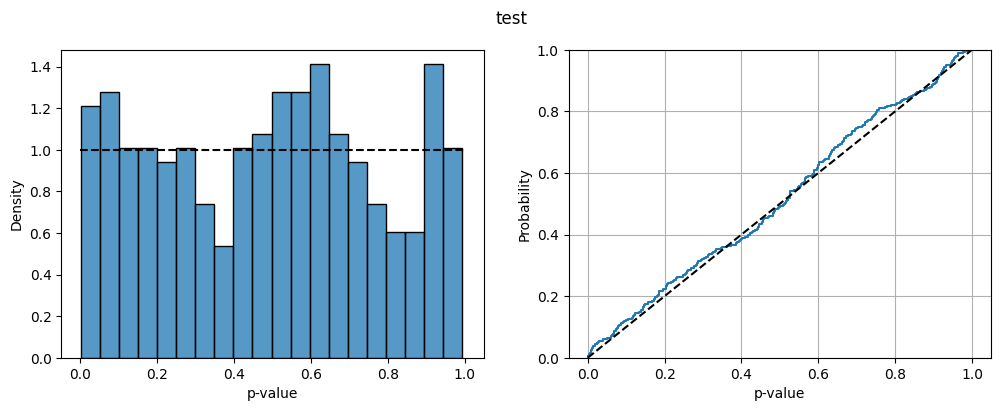

In [63]:
testing.aa_test(
    df=B,
    metric_name='ctr',
    id_name='Ключевая фраза'
)

#### Трансформация метрики отношения

In [64]:
from ab_tests.transform import Transform

In [65]:
trans = Transform()

In [66]:
A_g = A.groupby("Ключевая фраза").agg(
    {
        "Просмотры": "sum",
        "Клики": "sum"
    }
)
B_g = B.groupby("Ключевая фраза").agg(
    {
        "Просмотры": "sum",
        "Клики": "sum"
    }
)
history_group = history.groupby("Ключевая фраза").agg(
    {
        "Просмотры": "sum",
        "Клики": "sum"
    }
)
history_group

Просмотры  Клики
Ключевая фраза                                         
42 44 белый женский пиджак                     1      0
42 белый женский пиджак                        1      0
42 белый пиджак                                3      0
44 белый женский пиджак размер                 1      0
44 белый пиджак размер                         1      0
...                                          ...    ...
юбка зимняя твидовая                           1      0
юбка золотая короткая                          2      0
юбка плотная прямая                            1      0
юбка с карманами и пуговицами женская          1      0
юбки брюки женские нарядные                    2      0

[381 rows x 2 columns]

In [67]:
B_g, history_group = trans.linearization(
    df_control=history_group,
    df_pilot=B_g,
    metric_up="Клики",
    metric_bottom="Просмотры"
)
A_g

Просмотры  Клики
Ключевая фраза                                       
базовый пиджак                               1      0
белая юбка а силуэта                        29      0
белая юбка женская классическая              4      0
белые брюки короткие                         1      0
белый пиджак без подкладки                   2      0
...                                        ...    ...
юбка женская летняя короткая черная          1      0
юбка киргизия                                2      0
юбка короткая черная летняя                  2      0
юбка легкая женская короткая                 2      0
юбки летние женские на лето легкие          28      0

[233 rows x 2 columns]

In [68]:
df_tests_b = pd.merge(
    B_g,
    history_group,
    how="left",
    left_on="Ключевая фраза",
    right_on="Ключевая фраза",
)
df_tests_a = pd.merge(
    A_g,
    history_group,
    how="left",
    left_on="Ключевая фраза",
    right_on="Ключевая фраза",
)
df_tests_b.isnull().sum()

Просмотры_x          0
Клики_x              0
linear_metric_x      0
Просмотры_y        166
Клики_y            166
linear_metric_y    166
dtype: int64

In [69]:
B_cuped = trans.cuped(
    df=df_tests_b,
    metric_pilot="linear_metric_x",
    metric_control="linear_metric_y",
    covariate_name="linear_metric_y"
)

#### PIPILINE AB теста стр ВБ

In [70]:
from ab_tests.transform import Transform
from ab_tests.design_report import ReportABDesign

In [71]:
A_interval = ["2024-06-06", "2024-06-13"]  
B_interval = ["2024-05-28", "2024-06-05"]
history_interval = ["2024-05-20", "2024-05-27"]

In [72]:
A = df[
    (df['Дата'] >= A_interval[0])
    &
    (df['Дата'] <= A_interval[1])
]
B = df[
    (df['Дата'] >= B_interval[0])
    &
    (df['Дата'] <= B_interval[1])
]
history = df[
    (df['Дата'] >= history_interval[0])
    &
    (df['Дата'] <= history_interval[1])
]
B.head()

Ключевая фраза  Просмотры  Клики  CTR  Затраты       Дата  \
7              короткий блейзер          3      0  0.0     0.50 2024-05-28   
11   пиджак летний классический          1      0  0.0     0.17 2024-05-29   
13  пиджак в клетку черно белый          3      0  0.0     0.41 2024-06-04   
23  пиджак женский без подклада          3      0  0.0     0.42 2024-06-01   
29      пиджак женский весенний          2      0  0.0     0.27 2024-06-04   

    ctr  
7   0.0  
11  0.0  
13  0.0  
23  0.0  
29  0.0

In [73]:
A = A.groupby("Ключевая фраза").agg(
    {
        "Просмотры": "sum",
        "Клики": "sum"
    }
).reset_index()
B = B.groupby("Ключевая фраза").agg(
    {
        "Просмотры": "sum",
        "Клики": "sum"
    }
).reset_index()
history = history.groupby("Ключевая фраза").agg(
    {
        "Просмотры": "sum",
        "Клики": "sum"
    }
).reset_index()

A.head()

Ключевая фраза  Просмотры  Клики
0                   базовый пиджак          1      0
1             белая юбка а силуэта         29      0
2  белая юбка женская классическая          4      0
3             белые брюки короткие          1      0
4       белый пиджак без подкладки          2      0

In [74]:
B.head()

Ключевая фраза  Просмотры  Клики
0  42 белый женский пиджак размер          1      0
1          42 белый пиджак размер          1      0
2         46 белый женский пиджак          1      0
3                 48 белый пиджак          1      0
4          48 белый пиджак размер          1      0

In [75]:
a_ctr = A['Клики'].sum() * 100 / A['Просмотры'].sum()
b_ctr = B['Клики'].sum() * 100 / B['Просмотры'].sum()
change_absulute = b_ctr - a_ctr 
change_percent = (b_ctr - a_ctr) * 100  / b_ctr

print(change_absulute)
print(change_percent)

0.4546973136922472
11.989650218937676


In [76]:
# Линеаризация метрики отношения
trans = Transform()
A, B = trans.linearization(
    df_control=B,
    df_pilot=A,
    metric_up="Клики",
    metric_bottom="Просмотры"
)
A.head()


Ключевая фраза  Просмотры  Клики  linear_metric
0  42 белый женский пиджак размер          1      0      -0.037924
1          42 белый пиджак размер          1      0      -0.037924
2         46 белый женский пиджак          1      0      -0.037924
3                 48 белый пиджак          1      0      -0.037924
4          48 белый пиджак размер          1      0      -0.037924

In [77]:
B.head()

Ключевая фраза  Просмотры  Клики  linear_metric
0                   базовый пиджак          1      0      -0.037924
1             белая юбка а силуэта         29      0      -1.099800
2  белая юбка женская классическая          4      0      -0.151697
3             белые брюки короткие          1      0      -0.037924
4       белый пиджак без подкладки          2      0      -0.075848

In [78]:
df_test = pd.merge(
    A, B,
    how="left", 
    left_on="Ключевая фраза",
    right_on="Ключевая фраза"
)
df_test.head()

Ключевая фраза  Просмотры_x  Клики_x  linear_metric_x  \
0  42 белый женский пиджак размер            1        0        -0.037924   
1          42 белый пиджак размер            1        0        -0.037924   
2         46 белый женский пиджак            1        0        -0.037924   
3                 48 белый пиджак            1        0        -0.037924   
4          48 белый пиджак размер            1        0        -0.037924   

   Просмотры_y  Клики_y  linear_metric_y  
0          NaN      NaN              NaN  
1          NaN      NaN              NaN  
2          NaN      NaN              NaN  
3          NaN      NaN              NaN  
4          NaN      NaN              NaN

In [79]:
df_test = trans.cuped(
    df=df_test,
    metric_pilot="linear_metric_x",
    metric_control="linear_metric_y",
    covariate_name="linear_metric_y"
) 
df_test['ctr_a'] = df_test['Клики_x'] * 100 / df_test['Просмотры_x']
df_test['ctr_b'] = df_test['Клики_y'] * 100 / df_test['Просмотры_y']

df_test.head() 

Ключевая фраза  Просмотры_x  Клики_x  linear_metric_x  \
0  42 белый женский пиджак размер            1        0        -0.037924   
1          42 белый пиджак размер            1        0        -0.037924   
2         46 белый женский пиджак            1        0        -0.037924   
3                 48 белый пиджак            1        0        -0.037924   
4          48 белый пиджак размер            1        0        -0.037924   

   Просмотры_y  Клики_y  linear_metric_y  cuped_pilot  cuped_control  ctr_a  \
0          0.0      0.0              0.0    -0.037924            0.0    0.0   
1          0.0      0.0              0.0    -0.037924            0.0    0.0   
2          0.0      0.0              0.0    -0.037924            0.0    0.0   
3          0.0      0.0              0.0    -0.037924            0.0    0.0   
4          0.0      0.0              0.0    -0.037924            0.0    0.0   

   ctr_b  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [83]:
design = ReportABDesign()

design.check_testing_design(
    df=df_test,
    metric_name="cuped_control",
    need_absolute_effect=0.45,
)

('\n        std: 1.7557911157029098;\n        Кол-во наблюдений: 307;\n        MDE: 0.3970292419581062;\n        \nВы можете отследить эффект в 0.882 меньший, нежели хотите.\nДля отслеживания эффекта в 0.45 соберите 239 наблюдений,\nлибо измените дизайн тестирования в соотвествии с таблицей ошибок и эффектов.',
 errors      0.05     0.10     0.15     0.20
 effects                                    
 5.0%     3378686  2226641  1593934  1172066
 10.0%     844672   556661   398484   293017
 15.0%     375410   247405   177104   130230
 20.0%     211168   139166    99621    73255
 25.0%     135148    89066    63758    46883
 30.0%      93853    61852    44276    32558
 35.0%      68953    45442    32530    23920
 40.0%      52792    34792    24906    18314
 45.0%      41713    27490    19679    14470
 50.0%      33787    22267    15940    11721,
 None,
 None)

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ключевая фраза   307 non-null    object 
 1   Просмотры_x      307 non-null    int64  
 2   Клики_x          307 non-null    int64  
 3   linear_metric_x  307 non-null    float64
 4   Просмотры_y      307 non-null    float64
 5   Клики_y          307 non-null    float64
 6   linear_metric_y  307 non-null    float64
 7   cuped_pilot      307 non-null    float64
 8   cuped_control    307 non-null    float64
 9   ctr_a            307 non-null    float64
 10  ctr_b            171 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 26.5+ KB


In [82]:
df_test['cuped'].var()

KeyError: 'cuped'

In [ ]:
df_test['linear_metric_y'].var()

10.877435555596888